# Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv(r"C:\Users\Bharat Batra\Downloads\Amazon Sale Report.csv")
df

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128971,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,False,NaN,NaN,NaN
128972,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,...,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,False,NaN,NaN,NaN
128973,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Blazzer,XXL,Shipped,...,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,False,NaN,NaN,NaN
128974,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XS,Shipped,...,INR,1199.00,Halol,Gujarat,389350.0,IN,False,NaN,NaN,NaN


In [3]:
df.shape

(128976, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [5]:
df.isnull().sum()

index                      0
Order ID                   0
Date                       0
Status                     0
Fulfilment                 0
Sales Channel              0
ship-service-level         0
Category                   0
Size                       0
Courier Status             0
Qty                        0
currency                7800
Amount                  7800
ship-city                 35
ship-state                35
ship-postal-code          35
ship-country              35
B2B                        0
fulfilled-by           89713
New                   128976
PendingS              128976
dtype: int64

# Data Cleaning

In [6]:
df.drop(columns=["New", "PendingS"], inplace= True)

In [7]:
df= df.dropna()

In [8]:
df.shape

(37514, 19)

In [9]:
import datetime as dt

In [10]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
sales= df.groupby('Month')['Amount'].mean()

print(sales)

Month
3    618.254348
4    614.147921
5    664.143995
6    674.143330
Name: Amount, dtype: float64


C:\Users\Bharat Batra\AppData\Local\Temp\ipykernel_15344\613069524.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])
C:\Users\Bharat Batra\AppData\Local\Temp\ipykernel_15344\613069524.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['Date'].dt.month


# Exploratory Data Analysis

In [11]:
sales_by_state = df.groupby('ship-state')['Amount'].mean()

In [12]:
sales_by_state

ship-state
ANDAMAN & NICOBAR          625.918901
ANDHRA PRADESH             648.905527
ARUNACHAL PRADESH          677.433962
ASSAM                      672.331852
Arunachal Pradesh          673.000000
Arunachal pradesh          301.000000
BIHAR                      707.425793
Bihar                      721.000000
CHANDIGARH                 640.518304
CHHATTISGARH               656.802677
Chandigarh                 760.155000
DADRA AND NAGAR            691.520000
DELHI                      656.410726
Delhi                      557.633409
GOA                        591.872943
Goa                        595.888889
Gujarat                    652.570781
HARYANA                    682.935555
HIMACHAL PRADESH           673.294260
JAMMU & KASHMIR            686.136810
JHARKHAND                  681.641474
KARNATAKA                  624.930378
KERALA                     631.785621
LADAKH                     912.543000
LAKSHADWEEP                776.763333
MADHYA PRADESH             670.618787
M

In [13]:
sales_by_category = df.groupby('Category')['Amount'].sum()

In [14]:
sales_by_category

Category
Blazzer      4940322.12
Perfume       207672.66
Shirt        6121653.08
Shoes          25349.76
Socks          64238.50
T-shirt     11564206.65
Trousers     1214335.30
Wallet        117047.18
Name: Amount, dtype: float64

In [15]:
sales_by_date = df.groupby(df['Date'].dt.to_period('M'))['Amount'].sum()

In [16]:
sales_by_date

Date
2022-03      14219.85
2022-04    9268106.27
2022-05    8522295.75
2022-06    6450203.38
Freq: M, Name: Amount, dtype: float64

# Data Visualisation

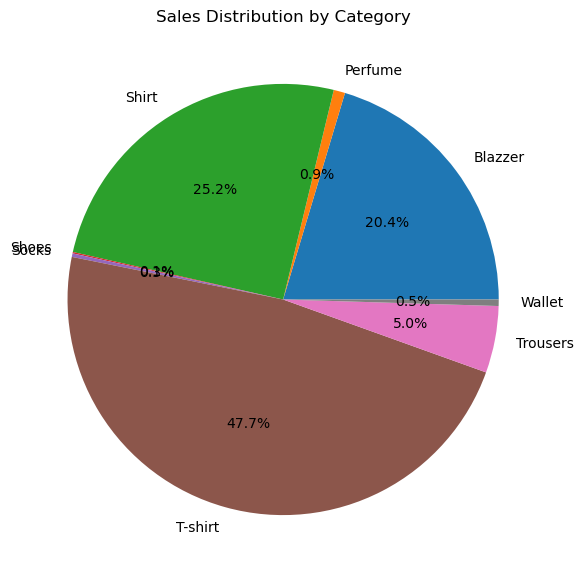

In [17]:
#SALES BY CATEGORY
sales_by_category.plot(kind='pie', autopct='%1.1f%%', figsize=(7,7))
plt.title('Sales Distribution by Category')
plt.ylabel('')
plt.show()

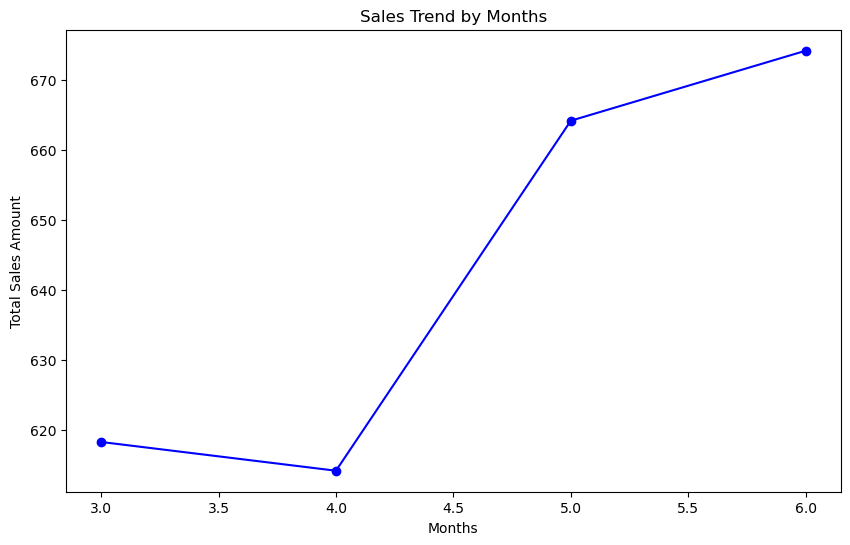

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sales.plot(kind='line', marker='o', title='Sales Trend by Months', color='b')
plt.ylabel('Total Sales Amount')
plt.xlabel('Months')
plt.show()

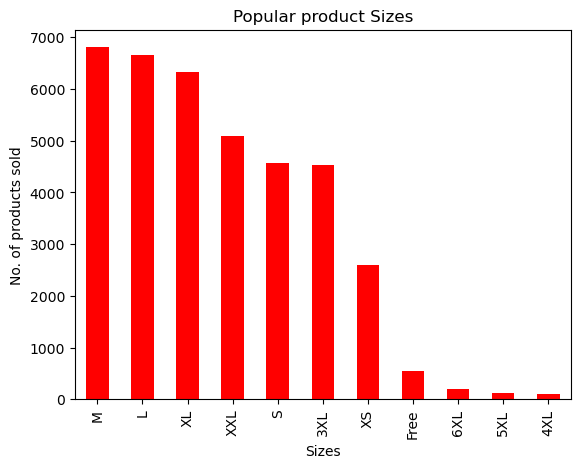

In [19]:
size= df["Size"].value_counts()
size.plot(kind= "bar", title= "Popular product Sizes", color= 'r')
plt.xlabel("Sizes")
plt.ylabel("No. of products sold")
plt.show()

C:\Users\Bharat Batra\AppData\Local\Temp\ipykernel_15344\2182595654.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)


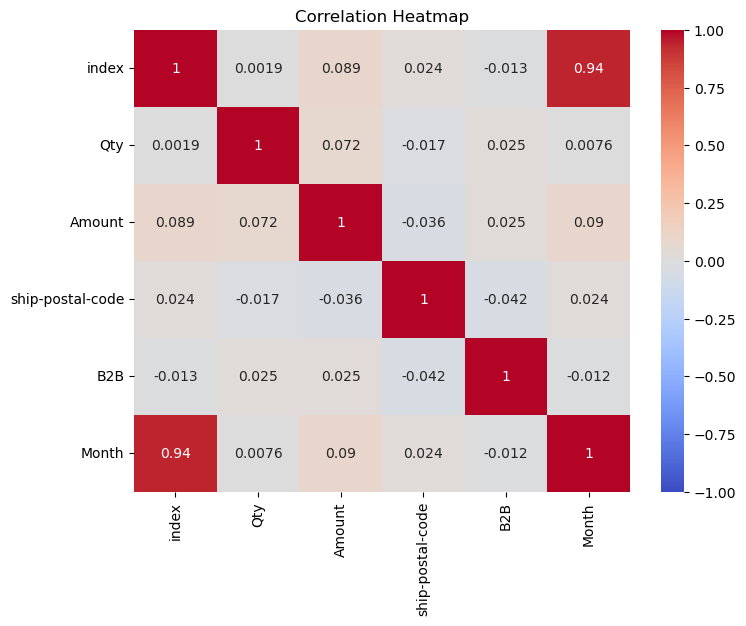

In [20]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

# Customer Segmentation

In [21]:
df

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,Month
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,4
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,4
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,4
7,7,406-7807733-3785945,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,S,Shipped,1,INR,399.00,HYDERABAD,TELANGANA,500032.0,IN,False,Easy Ship,4
12,12,405-5513694-8146768,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,XS,Shipped,1,INR,399.00,Amravati.,MAHARASHTRA,444606.0,IN,False,Easy Ship,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128875,128874,405-4724097-1016369,2022-06-01,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,T-shirt,S,Shipped,1,INR,854.00,ALLUR,ANDHRA PRADESH,524315.0,IN,False,Easy Ship,6
128876,128875,403-9524128-9243508,2022-06-01,Cancelled,Merchant,Amazon.in,Standard,Blazzer,XL,On the Way,0,INR,734.29,Barabanki,UTTAR PRADESH,225001.0,IN,False,Easy Ship,6
128888,128887,405-6493630-8542756,2022-05-31,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Trousers,M,Shipped,1,INR,518.00,NOIDA,UTTAR PRADESH,201301.0,IN,False,Easy Ship,5
128891,128890,407-0116398-1810752,2022-05-31,Cancelled,Merchant,Amazon.in,Standard,Wallet,Free,On the Way,0,INR,398.10,MADURAI,TAMIL NADU,625007.0,IN,False,Easy Ship,5


In [22]:
df.describe()

,index,Qty,Amount,ship-postal-code,Month
count,37514.000000,37514.000000,37514.000000,37514.000000,37514.000000
mean,60953.809858,0.867383,646.553960,463291.552754,4.851549
std,36844.853039,0.354160,279.952414,194550.425637,0.798599
min,0.000000,0.000000,0.000000,110001.000000,3.000000
25%,27235.250000,1.000000,458.000000,370465.000000,4.000000
50%,63470.500000,1.000000,629.000000,500019.000000,5.000000
75%,91790.750000,1.000000,771.000000,600042.000000,6.000000
max,128891.000000,5.000000,5495.000000,989898.000000,6.000000


In [23]:
import warnings
warnings.filterwarnings("ignore")

In [24]:
a= df[["Order ID","Amount", "Qty", "ship-country", "ship-state", "ship-city"]]

In [25]:
from sklearn. preprocessing import OneHotEncoder
oe= OneHotEncoder(sparse= False)
a["ship-country"]= oe.fit_transform(a[["ship-country"]])
a["ship-state"]= oe.fit_transform(a[["ship-state"]])
a["ship-city"]= oe.fit_transform(a[["ship-city"]])

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
X = a.drop(['Order ID'], axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=4, random_state=42)
a['Customer Segment'] = kmeans.fit_predict(X_scaled)
print(a[['Order ID', 'Amount', 'Qty', 'ship-state', 'Customer Segment']].head(20))

               Order ID   Amount  Qty  ship-state  Customer Segment
0   405-8078784-5731545   647.62    0         0.0                 2
1   171-9198151-1101146   406.00    1         0.0                 0
3   403-9615377-8133951   753.33    0         0.0                 2
7   406-7807733-3785945   399.00    1         0.0                 0
12  405-5513694-8146768   399.00    1         0.0                 0
14  408-1298370-1920302   771.00    1         0.0                 0
15  403-4965581-9520319   544.00    1         0.0                 0
18  402-4030358-5835511   458.00    1         0.0                 0
23  404-6019946-2909948   570.48    0         0.0                 2
25  405-8191138-5176316   582.00    1         0.0                 0
26  403-9230474-9657916   299.00    1         0.0                 0
32  404-9632124-1107550  1233.00    1         0.0                 0
33  402-1465437-0579556   517.00    1         0.0                 0
35  402-2764952-1492318   499.00    1         0.

# Predictive Analysis

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [31]:
x = a[['Qty', 'ship-state', 'ship-city', 'Customer Segment']]
y = a['Amount']

In [32]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size= 0.2, random_state=42)

In [33]:
model= RandomForestRegressor()
model.fit(x_train, y_train)

pred= model.predict(x_test)

accuracy= r2_score(y_test, pred)
print(f"Accuracy: {accuracy*100}%")

Accuracy: 0.798776752628727%
